In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ecdf
import time

# Import Data

In [3]:
import pickle

def upload_data(N: int, B_exp: int):
    folder_name = f"../experiments/pareto_income_data/data/N_{N}/B_exp_{B_exp}"
    output = {}
    # import data
    with open(f'{folder_name}/pareto_data.pkl', 'rb') as f:
        data = pickle.load(f)
    output["data"] = data

    # import bins
    with open(f'{folder_name}/pareto_bins.pkl', 'rb') as f:
        bins = pickle.load(f)
    output["bins"] = bins

    # import intervals
    with open(f'{folder_name}/pareto_intervals.pkl', 'rb') as f:
        intervals = pickle.load(f)
    output["intervals"] = intervals

    # import median
    with open(f'{folder_name}/pareto_median.pkl', 'rb') as f:
        median = pickle.load(f)
    output["median"] = median

    # import median quantile
    with open(f'{folder_name}/pareto_median_quantile.pkl', 'rb') as f:
        median_quantile = pickle.load(f)
    output["median_quantile"] = median_quantile

    # import cdf
    with open(f'{folder_name}/pareto_cdf.pkl', 'rb') as f:
        cf_dict = pickle.load(f)
    output["cf_dict"] = cf_dict

    return output


N = 5000
B_exp = 9
data_dict = upload_data(N, B_exp)

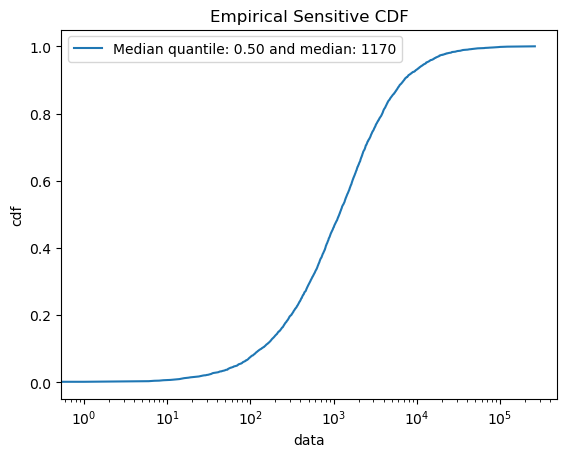

In [4]:
# print cdf of the data
import numpy as np
import matplotlib.pyplot as plt

cdf = data_dict["cf_dict"]
median = data_dict["median"]
median_quantile = data_dict["median_quantile"]
x = np.array(list(cdf.keys()))
y = np.array(list(cdf.values()))
plt.plot(x, y, label=f"Median quantile: {median_quantile:.2f} and median: {median}")
plt.xlabel("data")
plt.xscale("log")
plt.ylabel("cdf")
plt.title("Empirical Sensitive CDF")
plt.legend()
plt.show()

# Mechanism

In [5]:
from hierarchical_mechanism.mechanism import hierarchical_mechanism_quantile
from hierarchical_mechanism.data_structure import Tree

In [6]:
start = time.time()
tree = Tree(data_dict["bins"], branching=4)
print(f"Tree construction time: {time.time() - start:.2f} seconds")

Tree construction time: 3.76 seconds


In [26]:
eps = 10
replacement = False
target = 0.5
start = time.time()
dp_median = hierarchical_mechanism_quantile(tree=tree, 
                                            data=data_dict["data"],
                                            protocol="unary_encoding",
                                            eps=eps, 
                                            target=target, 
                                            replacement=replacement)
print(f"Hierarchical mechanism time: {time.time() - start:.2f} seconds")

Hierarchical mechanism time: 5.21 seconds


# Error

In [27]:
from metrics import get_quantile_absolute_error, success
alpha = 0.05
print("True median:", median)
print("DP median:", dp_median)
print("Absolute error:", get_quantile_absolute_error(median, dp_median, cdf))
print("Success:", success(dp_median, alpha, cdf))

True median: 1170
DP median: 1180
Absolute error: 0.0020000000000000018
Success: True


# Tree cdf

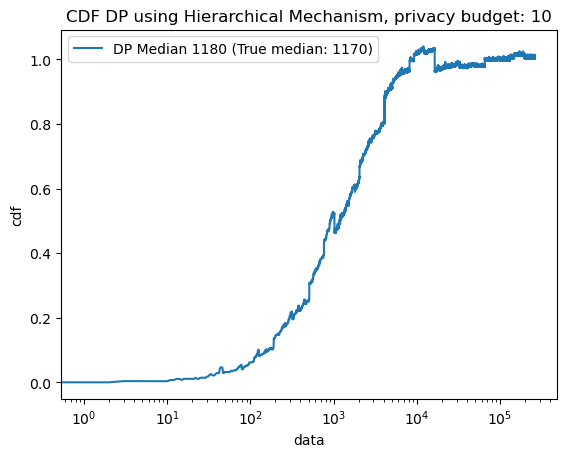

In [28]:
cdf_dp = tree.cdf
# plot cdf
plt.plot(cdf_dp, label=f"DP Median {dp_median} (True median: {median})")
plt.xlabel("data")
plt.xscale("log")
plt.ylabel("cdf")
plt.title(f"CDF DP using Hierarchical Mechanism, privacy budget: {eps}")
plt.legend()
plt.show()